In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 统一颜色设置
COLORS = {
    "Sto_to_Rel_UCB": "blue",
    "Pure_Online": "green",
    "RUCB": "orange",
    "InterleavedFilter2": "red"
}

# 统一绘图参数
FIG_SIZE = (8, 5)
FONT_SIZE = 12
plt.rcParams.update({'font.size': FONT_SIZE})

# 算法名称映射（用于实验 1 和实验 2）
algo_map = {
    'Sto_to_Rel_UCB': 'sto',
    'RUCB': 'rucb',
    'Pure_Online': 'pure',
    'InterleavedFilter2': 'if'
}

legend_map = {
    'Sto_to_Rel_UCB': 'HybUCB-AR',
    'RUCB': 'RUCB',
    'Pure_Online': 'HybUCB-AR without offline', 
    'InterleavedFilter2': 'InterleavedFilter'
}

# 加载 regret 数据（用于合成实验）
def load_regrets_syn(experiment_dir, algo_name, is_synthetic_1=False, is_synthetic_2=False):
    algo_dir = experiment_dir
    if not os.path.exists(algo_dir):
        print(f"警告：目录 {algo_dir} 不存在")
        return []
    algo_prefix = algo_map.get(algo_name, algo_name.lower())
    files = [f for f in os.listdir(algo_dir) if f.startswith(f"regret_{algo_prefix}_run_") and f.endswith(".npy")]
    print(f"在 {algo_dir} 中找到的文件（{algo_name}）：{files}")
    if not files:
        print(f"警告：未在 {algo_dir} 中找到匹配的 .npy 文件（{algo_name}）")
        return []
    return [np.load(os.path.join(algo_dir, f)) for f in files]

# 绘制遗憾曲线的函数（用于合成实验）
def plot_regret_syn(ax, regrets, label, color, linestyle="-", k_dir=None, algo_name=None, is_synthetic_1=False, is_synthetic_2=False, param=None, value=None):
    if not regrets:
        print(f"警告：算法 {label} 没有遗憾数据")
        return None
    regrets = np.array(regrets)
    mean_regret = np.mean(regrets, axis=0)
    std_regret = np.std(regrets, axis=0)
    rounds = range(1, len(mean_regret) + 1)
    if k_dir and algo_name and param and value is not None:
        algo_dir = k_dir
        if not os.path.exists(algo_dir):
            print(f"警告：目录 {algo_dir} 不存在")
            file_count = 1
        else:
            # 匹配特定参数值的文件，例如 regret_Noffline500_run_*.npy
            file_count = sum(1 for f in os.listdir(algo_dir) if f.startswith(f"regret_{param}{value}_run_") and f.endswith(".npy"))
        file_count = max(file_count, 1)
    else:
        file_count = len(regrets)  # 回退到已加载的 regrets 数量
    print(f"算法 {algo_name} 的文件数 = {file_count}")
    line = ax.plot(rounds, mean_regret, label=label, color=color, linestyle=linestyle)[0]
    adjusted_std_regret = std_regret / np.sqrt(file_count)

    if is_synthetic_2:
        interval = 6000
        x_positions = np.arange(0, len(rounds), interval)
        x_positions = x_positions[x_positions < len(rounds)]
        for x in x_positions:
            ax.vlines(x=x, ymin=mean_regret[x] - adjusted_std_regret[x],
                      ymax=mean_regret[x] + adjusted_std_regret[x],
                      color=color, alpha=0.5, linewidth=1)
    else:
        ax.fill_between(rounds, mean_regret - adjusted_std_regret, mean_regret + adjusted_std_regret, color=color, alpha=0.2)
    return line

在 ../output_syn/synthetic_example_1/K_8 中找到的文件（Sto_to_Rel_UCB）：['regret_sto_run_2_20250514_225933_011.npy', 'regret_sto_run_2_20250503_181038_019.npy', 'regret_sto_run_0_20250515_010535_006.npy', 'regret_sto_run_3_20250503_181038_015.npy', 'regret_sto_run_4_20250515_010535_019.npy', 'regret_sto_run_1_20250503_181038_012.npy', 'regret_sto_run_3_20250503_181038_008.npy', 'regret_sto_run_2_20250515_010535_016.npy', 'regret_sto_run_3_20250515_010535_002.npy', 'regret_sto_run_4_20250514_225933_017.npy', 'regret_sto_run_0_20250503_181038_016.npy', 'regret_sto_run_0_20250515_010535_017.npy', 'regret_sto_run_1_20250514_225933_014.npy', 'regret_sto_run_3_20250514_225933_017.npy', 'regret_sto_run_0_20250515_010535_009.npy', 'regret_sto_run_0_20250503_181038_004.npy', 'regret_sto_run_1_20250515_010535_018.npy', 'regret_sto_run_0_20250515_010535_003.npy', 'regret_sto_run_4_20250503_181038_015.npy', 'regret_sto_run_3_20250514_225933_008.npy', 'regret_sto_run_0_20250514_225933_009.npy', 'regret_sto_

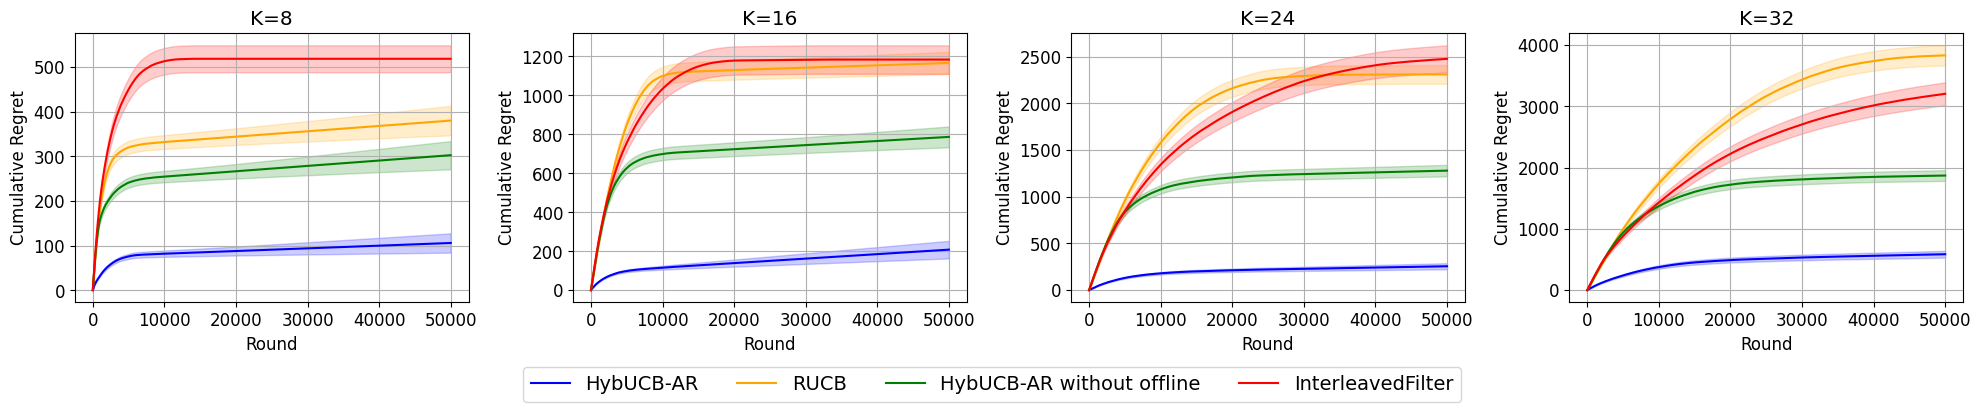

In [9]:
# 合成实验 1：不同 K 的合成数据集
experiment_dir_1 = "../output_syn/synthetic_example_1"
Ks = [8, 16, 24, 32]

# 创建一个包含四个子图的单行布局
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# 为每个 K 值绘制子图
for idx, K in enumerate(Ks):
    k_dir = os.path.join(experiment_dir_1, f"K_{K}")
    ax = axes[idx]
    
    # 绘制每个算法的遗憾值
    handles = []
    labels = []
    for algo_name in algo_map.keys():
        regrets = load_regrets_syn(k_dir, algo_name, is_synthetic_1=True, is_synthetic_2=False)
        if regrets:
            # 使用 legend_map 中的显示名称作为图例标签
            display_name = legend_map.get(algo_name, algo_name)
            line, = ax.plot([], [], label=display_name, color=COLORS[algo_name])
            handles.append(line)
            labels.append(display_name)
            plot_regret_syn(ax, regrets, display_name, COLORS[algo_name], k_dir=k_dir, algo_name=algo_name, is_synthetic_1=True, is_synthetic_2=False)
    
    # 设置图表属性
    ax.set_xlabel("Round")
    ax.set_ylabel("Cumulative Regret")
    ax.set_title(f"K={K}")
    ax.grid(True)

# 添加统一的图例，放在下一行并横向排列，增大字体
fig.legend(handles, labels, loc="lower center", ncol=len(algo_map), bbox_to_anchor=(0.5, -0.1), frameon=True, fontsize=14)

# 调整布局，确保图例不重叠
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 保存图片到实验目录
plt.savefig(os.path.join(experiment_dir_1, "alg1_syn1.png"))
plt.show()

In [10]:
# 计算 Pure_Online 相对于 RUCB 的遗憾降低百分比（均值和方差，排除异常值）
def calculate_regret_reduction_stats(experiment_dir, Ks, algo_map, pure_algo="Pure_Online", rucb_algo="RUCB"):
    for K in Ks:
        k_dir = os.path.join(experiment_dir, f"K_{K}")
        
        # 检查目录是否存在
        if not os.path.exists(k_dir):
            print(f"K={K}：目录 {k_dir} 不存在，跳过")
            continue
        
        # 获取 Pure_Online 和 RUCB 的文件列表
        pure_prefix = algo_map[pure_algo]
        rucb_prefix = algo_map[rucb_algo]
        pure_files = [f for f in os.listdir(k_dir) if f.startswith(f"regret_{pure_prefix}_run_") and f.endswith(".npy")]
        rucb_files = [f for f in os.listdir(k_dir) if f.startswith(f"regret_{rucb_prefix}_run_") and f.endswith(".npy")]
        
        # 提取文件名后10位（不包括 .npy）并匹配
        pure_suffixes = [f[-14:-4] for f in pure_files]
        rucb_suffixes = [f[-14:-4] for f in rucb_files]
        common_suffixes = set(pure_suffixes) & set(rucb_suffixes)
        
        if not common_suffixes:
            print(f"K={K}：没有找到文件名后10位相同的 Pure_Online 和 RUCB 文件")
            continue
        
        regret_reductions = []
        
        # 对每对匹配的文件计算遗憾降低百分比
        for suffix in common_suffixes:
            pure_file = next(f for f in pure_files if f.endswith(f"{suffix}.npy"))
            rucb_file = next(f for f in rucb_files if f.endswith(f"{suffix}.npy"))
            
            # 加载遗憾数据
            pure_regret = np.load(os.path.join(k_dir, pure_file))
            rucb_regret = np.load(os.path.join(k_dir, rucb_file))
            
            # 获取最后一个时间步的遗憾
            pure_last_regret = pure_regret[-1]
            rucb_last_regret = rucb_regret[-1]
            
            # 计算遗憾降低百分比
            if rucb_last_regret == 0:
                print(f"K={K}，文件后缀 {suffix}：RUCB 遗憾为 0，无法计算百分比")
                continue
            
            regret_reduction = (rucb_last_regret - pure_last_regret) / rucb_last_regret * 100
            regret_reductions.append(regret_reduction)
        
        if not regret_reductions:
            print(f"K={K}：没有有效的遗憾降低百分比数据")
            continue
        
        # 排除绝对值高于100%的异常值
        filtered_reductions = [r for r in regret_reductions if abs(r) <= 100]
        
        if not filtered_reductions:
            print(f"K={K}：所有遗憾降低百分比的绝对值高于100%，无法计算统计量")
            continue
        
        # 计算均值和方差
        mean_reduction = np.mean(filtered_reductions)
        var_reduction = np.var(filtered_reductions, ddof=1)  # 使用样本方差（ddof=1）
        
        print(f"K={K}：")
        print(f"  匹配的文件对数: {len(regret_reductions)}")
        print(f"  过滤后的有效数据点数（绝对值≤100%）: {len(filtered_reductions)}")
        print(f"  Pure_Online 相对于 RUCB 的遗憾降低百分比均值: {mean_reduction:.2f}%")
        print(f"  Pure_Online 相对于 RUCB 的遗憾降低百分比方差: {var_reduction:.2f}")

# 调用函数计算
experiment_dir_1 = "../output_syn/synthetic_example_1"
Ks = [8, 16, 24, 32]
calculate_regret_reduction_stats(experiment_dir_1, Ks, algo_map)

K=8：
  匹配的文件对数: 60
  过滤后的有效数据点数（绝对值≤100%）: 59
  Pure_Online 相对于 RUCB 的遗憾降低百分比均值: 18.35%
  Pure_Online 相对于 RUCB 的遗憾降低百分比方差: 1420.30
K=16：
  匹配的文件对数: 60
  过滤后的有效数据点数（绝对值≤100%）: 58
  Pure_Online 相对于 RUCB 的遗憾降低百分比均值: 38.42%
  Pure_Online 相对于 RUCB 的遗憾降低百分比方差: 529.24
K=24：
  匹配的文件对数: 60
  过滤后的有效数据点数（绝对值≤100%）: 60
  Pure_Online 相对于 RUCB 的遗憾降低百分比均值: 47.10%
  Pure_Online 相对于 RUCB 的遗憾降低百分比方差: 327.95
K=32：
  匹配的文件对数: 60
  过滤后的有效数据点数（绝对值≤100%）: 60
  Pure_Online 相对于 RUCB 的遗憾降低百分比均值: 50.14%
  Pure_Online 相对于 RUCB 的遗憾降低百分比方差: 254.42


算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400
算法 Sto_to_Rel_UCB 的文件数 = 400


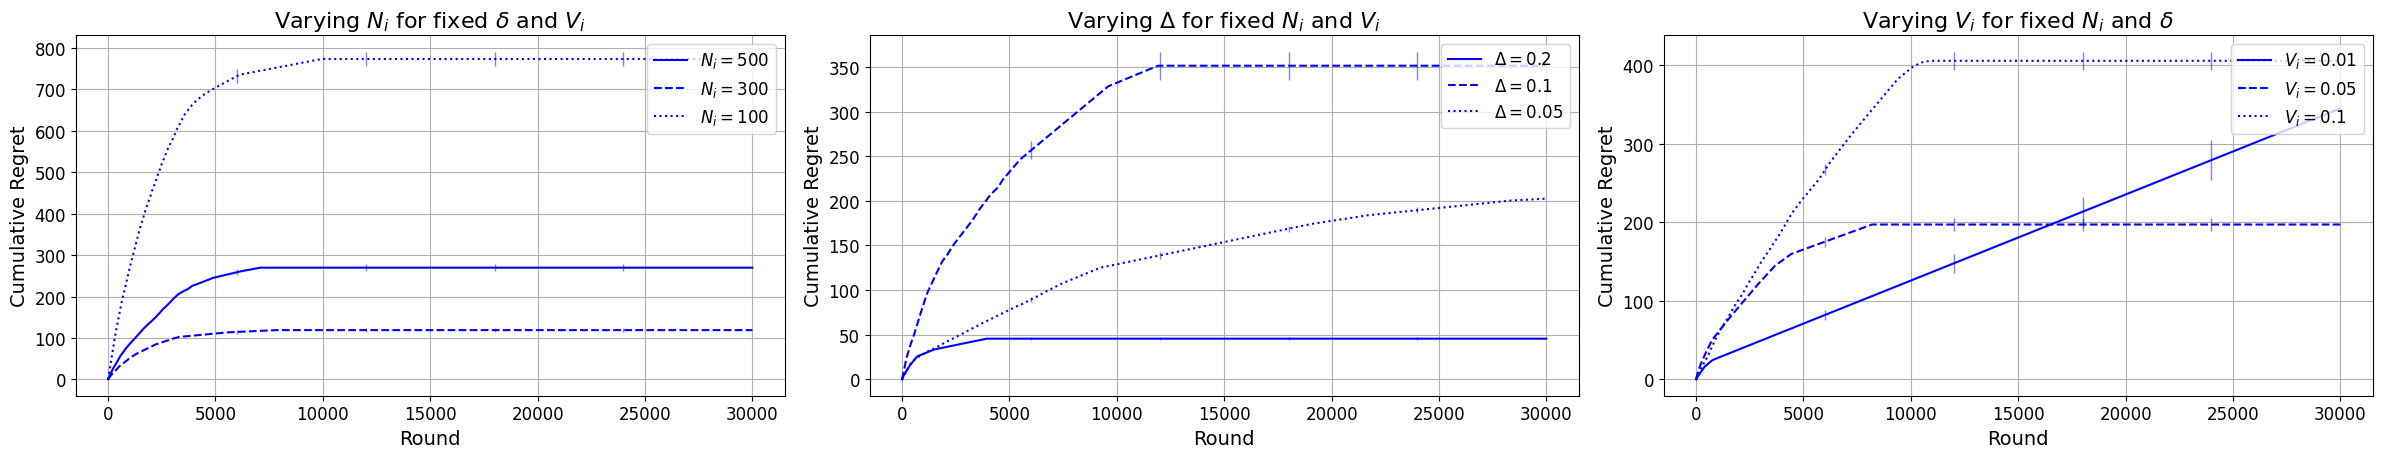

In [11]:
# 参数敏感性分析（仅 Sto_to_Rel_UCB）
experiment_dir_2 = "../output_syn/synthetic_example_2"
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

LINESTYLES = ["-", "--", ":"]
BLUE_COLOR = "blue"

# N_offline
n_offline_dir = os.path.join(experiment_dir_2, "N_offline")
N_is = [500, 300, 100]
ax = axes[0]
handles = []
for i, N in enumerate(N_is):
    regrets = []
    for run in range(5):
        files = [f for f in os.listdir(n_offline_dir) if f.startswith(f"regret_Noffline{N}_run_{run}_") and f.endswith(".npy")]
        if not files:
            raise FileNotFoundError(f"No file found for N_i={N}, run={run} in {n_offline_dir}")
        file_path = os.path.join(n_offline_dir, files[0])
        regret = np.load(file_path)
        regrets.append(regret)
    line = plot_regret_syn(ax, regrets, fr"$N_i={N}$", BLUE_COLOR, linestyle=LINESTYLES[i], 
                           k_dir=n_offline_dir, algo_name="Sto_to_Rel_UCB", 
                           is_synthetic_1=False, is_synthetic_2=True, param="Noffline", value=N)
    handles.append(line)
ax.set_xlabel("Round", fontsize=14)
ax.set_ylabel("Cumulative Regret", fontsize=14)
ax.set_title(r"Varying $N_i$ for fixed $\delta$ and $V_i$", fontsize=16)
ax.grid(True)
ax.legend(handles=handles, loc="upper right")

# delta (原 gap)
gap_dir = os.path.join(experiment_dir_2, "gap")
deltas = [0.2, 0.1, 0.05]
ax = axes[1]
handles = []
for i, delta in enumerate(deltas):
    regrets = []
    for run in range(5):
        files = [f for f in os.listdir(gap_dir) if f.startswith(f"regret_gap{delta}_run_{run}_") and f.endswith(".npy")]
        if not files:
            raise FileNotFoundError(f"No file found for delta={delta}, run={run} in {gap_dir}")
        file_path = os.path.join(gap_dir, files[0])
        regret = np.load(file_path)
        regrets.append(regret)
    line = plot_regret_syn(ax, regrets, fr"$\Delta={delta}$", BLUE_COLOR, linestyle=LINESTYLES[i], 
                           k_dir=gap_dir, algo_name="Sto_to_Rel_UCB", 
                           is_synthetic_1=False, is_synthetic_2=True, param="gap", value=delta)
    handles.append(line)
ax.set_xlabel("Round", fontsize=14)
ax.set_ylabel("Cumulative Regret", fontsize=14)
ax.set_title(r"Varying $\Delta$ for fixed $N_i$ and $V_i$", fontsize=16)
ax.grid(True)
ax.legend(handles=handles, loc="upper right")

# V_i (原 bias)
bias_dir = os.path.join(experiment_dir_2, "bias")
V_is = [0.01, 0.05, 0.1]
ax = axes[2]
handles = []
for i, V_i in enumerate(V_is):
    regrets = []
    for run in range(5):
        files = [f for f in os.listdir(bias_dir) if f.startswith(f"regret_bias{V_i}_run_{run}_") and f.endswith(".npy")]
        if not files:
            raise FileNotFoundError(f"No file found for V_i={V_i}, run={run} in {bias_dir}")
        file_path = os.path.join(bias_dir, files[0])
        regret = np.load(file_path)
        regrets.append(regret)
    line = plot_regret_syn(ax, regrets, fr"$V_i={V_i}$", BLUE_COLOR, linestyle=LINESTYLES[i], 
                           k_dir=bias_dir, algo_name="Sto_to_Rel_UCB", 
                           is_synthetic_1=False, is_synthetic_2=True, param="bias", value=V_i)
    handles.append(line)
ax.set_xlabel("Round", fontsize=14)
ax.set_ylabel("Cumulative Regret", fontsize=14)
ax.set_title(r"Varying $V_i$ for fixed $N_i$ and $\delta$", fontsize=16)
ax.grid(True)
ax.legend(handles=handles, loc="upper right")

# Adjust layout to avoid overlap with legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
plt.savefig(os.path.join(experiment_dir_2, "alg1_syn2.png"))
plt.show()

In [12]:
# 加载 regret 数据（用于真实数据实验）
def load_regrets(experiment_dir, algo_name):
    algo_dir = os.path.join(experiment_dir, algo_name)
    if not os.path.exists(algo_dir):
        print(f"警告：目录 {algo_dir} 不存在")
        return []
    
    algo_prefix = algo_map.get(algo_name, algo_name.lower())
    files = [f for f in os.listdir(algo_dir) if f.startswith(f"real_regret_{algo_prefix}_run_") and f.endswith(".npy")]
    print(f"在 {algo_dir} 中找到的文件（{algo_name}）：{files}")
    if not files:
        print(f"警告：未在 {algo_dir} 中找到匹配的 .npy 文件（{algo_name}）")
        return []
    return [np.load(os.path.join(algo_dir, f)) for f in files]

# 绘制遗憾曲线的函数（用于真实数据实验）
def plot_regret(ax, regrets, label, color, linestyle="-", k_dir=None, algo_name=None):
    if not regrets:
        print(f"警告：算法 {label} 没有遗憾数据")
        return
    regrets = np.array(regrets)
    mean_regret = np.mean(regrets, axis=0)
    std_regret = np.std(regrets, axis=0)
    rounds = range(1, len(mean_regret) + 1)
    if k_dir and algo_name:
        algo_dir = os.path.join(k_dir, algo_name)
        if not os.path.exists(algo_dir):
            print(f"警告：目录 {algo_dir} 不存在")
            file_count = 1
        else:
            algo_prefix = algo_map.get(algo_name, algo_name.lower())
            file_count = sum(1 for f in os.listdir(algo_dir) if f.startswith(f"real_regret_{algo_prefix}_run_") and f.endswith(".npy"))
        file_count = max(file_count, 1)
    else:
        file_count = len(regrets)
    print(f"算法 {algo_name} 的文件数 = {file_count}")
    ax.plot(rounds, mean_regret, label=label, color=color, linestyle=linestyle)
    adjusted_std_regret = std_regret / np.sqrt(file_count)
    ax.fill_between(rounds, mean_regret - adjusted_std_regret, mean_regret + adjusted_std_regret, color=color, alpha=0.2)

在 ../output_real/real_example_movielens/Sto_to_Rel_UCB 中找到的文件（Sto_to_Rel_UCB）：['real_regret_sto_run_0_20250515_010535_6.npy', 'real_regret_sto_run_1_20250515_010535_4.npy', 'real_regret_sto_run_0_20250515_010535_15.npy', 'real_regret_sto_run_1_20250515_010535_23.npy', 'real_regret_sto_run_0_20250515_010535_12.npy', 'real_regret_sto_run_0_20250515_010535_24.npy', 'real_regret_sto_run_1_20250515_010535_20.npy', 'real_regret_sto_run_0_20250515_010535_9.npy', 'real_regret_sto_run_0_20250515_010535_25.npy', 'real_regret_sto_run_1_20250515_010535_7.npy', 'real_regret_sto_run_1_20250515_010535_14.npy', 'real_regret_sto_run_0_20250515_010535_11.npy', 'real_regret_sto_run_0_20250515_010535_20.npy', 'real_regret_sto_run_1_20250515_010535_18.npy', 'real_regret_sto_run_0_20250515_010535_21.npy', 'real_regret_sto_run_0_20250515_010535_8.npy', 'real_regret_sto_run_1_20250515_010535_11.npy', 'real_regret_sto_run_0_20250515_010535_10.npy', 'real_regret_sto_run_1_20250515_010535_17.npy', 'real_regret_s

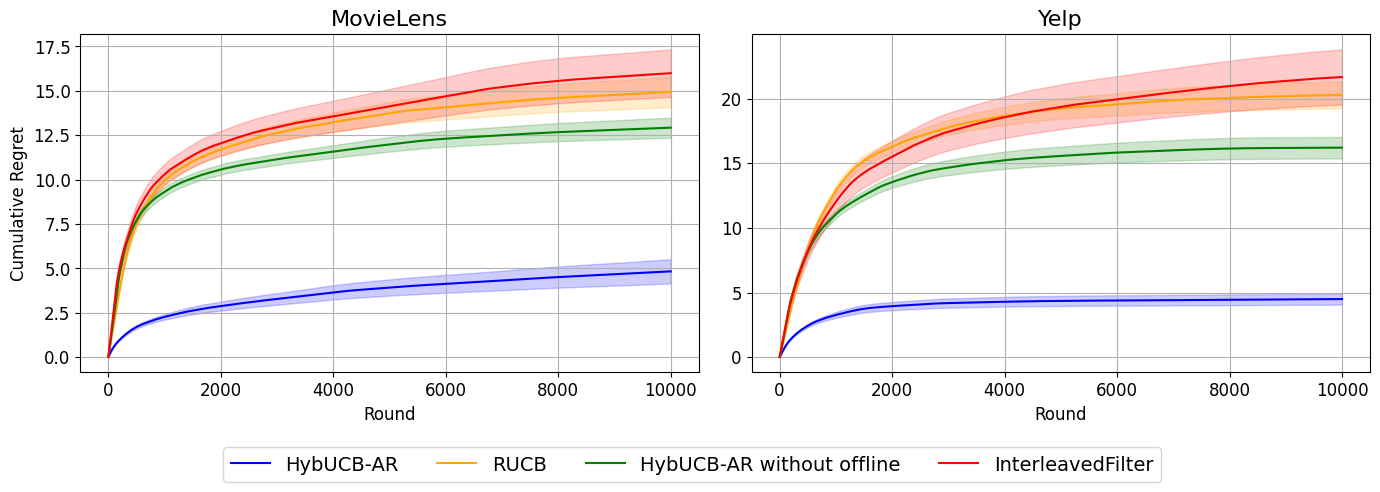

In [13]:
# 创建一个包含两个子图的单行布局
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 两倍宽度，适应两个子图

# 收集所有图例句柄和标签（用于共享图例）
handles = []
labels = []
unique_labels = set()  # 避免重复标签

# 第一个子图：MovieLens
experiment_dir_real_movielens = "../output_real/real_example_movielens"
for algo in algo_map.keys():
    regrets = load_regrets(experiment_dir_real_movielens, algo)
    if regrets:
        display_name = legend_map.get(algo, algo)
        # 只添加未见过的标签
        if display_name not in unique_labels:
            line, = ax[0].plot([], [], label=display_name, color=COLORS[algo])
            handles.append(line)
            labels.append(display_name)
            unique_labels.add(display_name)
        plot_regret(
            ax=ax[0],
            regrets=regrets,
            label=display_name,
            color=COLORS[algo],
            k_dir=experiment_dir_real_movielens,
            algo_name=algo
        )

# 设置 MovieLens 子图属性
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Cumulative Regret")
ax[0].set_title("MovieLens",fontsize=16)
ax[0].grid(True)

# 第二个子图：Yelp
experiment_dir_real_yelp = "../output_real/real_example_yelp"
for algo in algo_map.keys():
    regrets = load_regrets(experiment_dir_real_yelp, algo)
    if regrets:
        display_name = legend_map.get(algo, algo)
        # 只添加未见过的标签（理论上已被 MovieLens 添加，但以防万一）
        if display_name not in unique_labels:
            line, = ax[1].plot([], [], label=display_name, color=COLORS[algo])
            handles.append(line)
            labels.append(display_name)
            unique_labels.add(display_name)
        plot_regret(
            ax=ax[1],
            regrets=regrets,
            label=display_name,
            color=COLORS[algo],
            k_dir=experiment_dir_real_yelp,
            algo_name=algo
        )

# 设置 Yelp 子图属性
ax[1].set_xlabel("Round")
ax[1].set_title("Yelp",fontsize=16)
ax[1].grid(True)

# 添加统一的图例，放在整张图的下方中央
fig.legend(handles, labels, loc="lower center", ncol=len(algo_map), bbox_to_anchor=(0.5, 0), frameon=True, fontsize=14)

# 调整布局，确保图例不重叠
plt.tight_layout(rect=[0, 0.1, 1, 1])  

# 保存图片（保存到第一个实验目录，也可以选择其他路径）
plt.savefig(os.path.join("../output_real", "alg1_real.png"),bbox_inches='tight')
plt.show()

在 ../output_syn/synthetic_example_1/K_24 中找到的文件（Sto_to_Rel_UCB）：['regret_sto_run_2_20250514_225933_011.npy', 'regret_sto_run_2_20250503_181038_019.npy', 'regret_sto_run_0_20250515_010535_006.npy', 'regret_sto_run_3_20250503_181038_015.npy', 'regret_sto_run_4_20250515_010535_019.npy', 'regret_sto_run_1_20250503_181038_012.npy', 'regret_sto_run_3_20250503_181038_008.npy', 'regret_sto_run_2_20250515_010535_016.npy', 'regret_sto_run_3_20250515_010535_002.npy', 'regret_sto_run_4_20250514_225933_017.npy', 'regret_sto_run_0_20250503_181038_016.npy', 'regret_sto_run_0_20250515_010535_017.npy', 'regret_sto_run_1_20250514_225933_014.npy', 'regret_sto_run_3_20250514_225933_017.npy', 'regret_sto_run_0_20250515_010535_009.npy', 'regret_sto_run_0_20250503_181038_004.npy', 'regret_sto_run_1_20250515_010535_018.npy', 'regret_sto_run_0_20250515_010535_003.npy', 'regret_sto_run_4_20250503_181038_015.npy', 'regret_sto_run_3_20250514_225933_008.npy', 'regret_sto_run_0_20250514_225933_009.npy', 'regret_sto

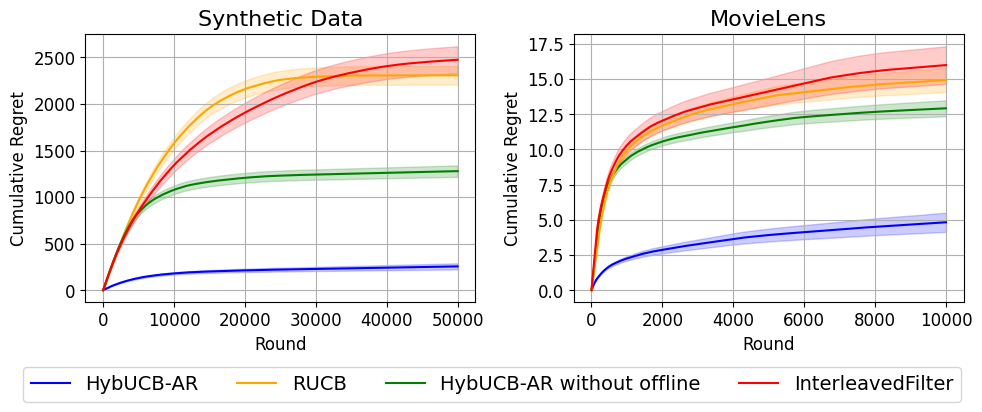

In [14]:
# Experiment 1: Synthetic dataset with K=24
experiment_dir_1 = "../output_syn/synthetic_example_1"
chosen_k = 24  # Specify K=24 for this plot

# Experiment 2: Real dataset (MovieLens)
experiment_dir_real = "../output_real/real_example_movielens"

output = "../output"

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # Independent y-axes

# --- Synthetic Data Plot (Left Subplot) ---
k_dir = os.path.join(experiment_dir_1, f"K_{chosen_k}")

# Load and plot regret data for synthetic data
handles = []  # Store legend handles (generated once for synthetic data)
labels = []   # Store legend labels
for algo_name in algo_map.keys():
    regrets = load_regrets_syn(k_dir, algo_name, is_synthetic_1=True, is_synthetic_2=False)
    if regrets:
        # 使用 legend_map 中的显示名称作为图例标签
        display_name = legend_map.get(algo_name, algo_name)
        line = ax1.plot([], [], label=display_name, color=COLORS[algo_name])[0]  # Pre-create legend handle
        handles.append(line)
        labels.append(display_name)
        plot_regret_syn(ax1, regrets, display_name, COLORS[algo_name], k_dir=k_dir, algo_name=algo_name, 
                        is_synthetic_1=True, is_synthetic_2=False)

# Set properties for synthetic data subplot
ax1.set_xlabel("Round")
ax1.set_ylabel("Cumulative Regret")
ax1.set_title(f"Synthetic Data",fontsize=16)  # Add title for clarity
ax1.grid(True)

# --- Real Data Plot (Right Subplot) ---
# Load and plot regret data for real data
for algo_name in COLORS.keys():
    regrets = load_regrets(experiment_dir_real, algo_name)
    if regrets:
        display_name = legend_map.get(algo_name, algo_name)
        plot_regret(ax2, regrets, display_name, COLORS[algo_name], k_dir=experiment_dir_real, algo_name=algo_name)

# Set properties for real data subplot
ax2.set_xlabel("Round")
ax2.set_ylabel("Cumulative Regret")
ax2.set_title("MovieLens",fontsize=16)  # Add title for clarity
ax2.grid(True)

# Add a single legend below the plot, horizontally aligned
fig.legend(handles, labels, loc="lower center", ncol=len(algo_map), bbox_to_anchor=(0.5, -0.1), frameon=True, fontsize=14)

# Adjust layout to avoid overlap with legend
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reserve space for the legend

# Save the combined figure
output_filename = os.path.join(output, "fig1.png")
plt.savefig(output_filename, bbox_inches='tight')
plt.show()